In [ ]:
# из библиотеки google.colab импортируем класс files
from google.colab import files
# создаем объект этого класса, применяем метод .upload()
uploaded = files.upload()


Saving test.csv to test (1).csv


In [ ]:
# импортируем модуль os
import os
# выводим пути к папкам (dirpath) и наименования файлов (filenames) и после этого
for dirpath, _, filenames in os.walk('/content/'):
# во вложенном цикле проходимся по названиям файлов
  for filename in filenames:
# и соединяем путь до папок и входящие в эти папкифайлы
# с помощью метода path.join()
    print(os.path.join(dirpath, filename))

/content/train.csv
/content/test.csv
/content/.config/active_config
/content/.config/.last_survey_prompt.yaml
/content/.config/gce
/content/.config/.last_update_check.json
/content/.config/config_sentinel
/content/.config/.last_opt_in_prompt.yaml
/content/.config/configurations/config_default
/content/.config/logs/2022.11.22/00.13.23.276767.log
/content/.config/logs/2022.11.22/00.13.55.296951.log
/content/.config/logs/2022.11.22/00.13.01.107222.log
/content/.config/logs/2022.11.22/00.12.36.088191.log
/content/.config/logs/2022.11.22/00.13.56.045946.log
/content/.config/logs/2022.11.22/00.13.32.115099.log
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_test.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_test.csv
/content/sample_data/mnist_train_small.csv


In [ ]:
!ls


sample_data  test.csv  train.csv


In [ ]:
!ls /content/sample_data/


anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [ ]:
# обратимся к ключу словаря uploaded и применим метод .decode()
uploaded_str = uploaded['test.csv'].decode()
# на выходе получаем обычную строку
print(type(uploaded_str))


<class 'str'>


In [ ]:
print(uploaded_str[:35])

PassengerId,Pclass,Name,Sex,Age,Sib


In [ ]:
uploaded_list = uploaded_str.split('\r\n')
type(uploaded_list)

list

In [ ]:
# не забудем создать индекс с помощью функции enumerate()
for i, line in enumerate(uploaded_list):
# начнем выводить записи
  print(line)
  # когда дойдем до четвертой строки
  if i == 3:
  # прервемся
    break


PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S
894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q


In [ ]:
# передадим функции open() адрес файла
# параметр 'r' означает, что мы хотим прочитать (read) файл
f1 = open('/content/train.csv', 'r')

In [ ]:
# метод .read() помещает весь файл в одну строку
# выведем первые 142 символа (если параметр неуказывать, выведется все содержимое)
print(f1.read(142))
# в конце файл необходимо закрыть
f1.close()


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S



In [ ]:
# импортируем библиотеку
import pandas as pd
# применим функцию read_csv() и посмотрим на первые три записи файла train.csv
train = pd.read_csv('/content/train.csv')
train.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
# сделаем то же самое с файлом test.csv
test = pd.read_csv('/content/test.csv')
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# для построения графиков воспользуемся новой для насбиблиотекой seaborn
import seaborn as sns

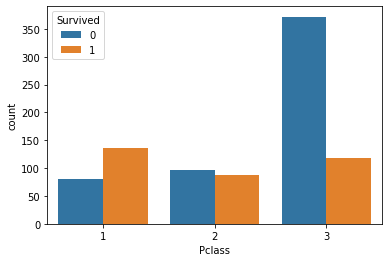

In [ ]:
# посмотрим насколько значим класс билета для выживания пассажира
# с помощью x и hue мы можем уместить две категориальные переменные на одном графике
sns.countplot(x = 'Pclass', hue = 'Survived', data =train)

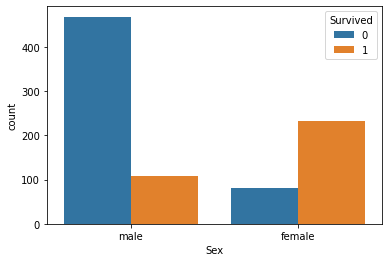

In [ ]:
# кто выживал чаще, мужчины или женщины?
sns.countplot(x = 'Sex', hue = 'Survived', data =
train)


In [ ]:
# выявим пропущенные значения с помощью .isnull() ипосчитаем их количество sum()
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# переменная Cabin (номер каюты), скорее всего, не является самой важной
# избавимся от нее с помощью метода .drop()
# (параметр axis отвечает за столбцы, inplace = True сохраняет изменения)
train.drop(columns = 'Cabin', axis = 1, inplace =True)


In [ ]:
train['Age'].fillna(train['Age'].mean(), inplace =True)


In [ ]:
# у нас остаются две пустые строки в Embarked, удалим их
train.dropna(inplace = True)

In [ ]:
train.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# применим one-hot encoding к переменной Sex (пол) с помощью метода .get_dummies() 2
pd.get_dummies(train['Sex']).head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [ ]:
# удалим первый столбец, он избыточен
sex = pd.get_dummies(train['Sex'], drop_first = True)
sex.head(3)


,male
0,1
1,0
2,0


In [ ]:
embarked = pd.get_dummies(train['Embarked'],drop_first = True)
pclass = pd.get_dummies(train['Pclass'], drop_first =True)

In [ ]:
train = pd.concat([train, pclass, sex, embarked],axis = 1)


In [ ]:
# применим функцию drop() к соответствующим столбцам
train.drop(['PassengerId', 'Pclass', 'Name', 'Sex','Ticket', 'Embarked'], axis = 1, inplace = True)
train.head(3)

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1


In [ ]:
# импортируем класс StandardScaler
from sklearn.preprocessing import StandardScaler
# создадим объект этого класса
scaler = StandardScaler()
# выберем те столбцы, которые мы хотим масштабировать
cols_to_scale = ['Age', 'Fare']
# рассчитаем среднее арифметическое и СКО для масштабирования данных
scaler.fit(train[cols_to_scale])

# применим их
train[cols_to_scale] = scaler.transform(train[cols_to_scale])
# посмотрим на результат
train.head(3)


,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,-0.590495,1,0,-0.500240,0,1,1,0,1
1,1,0.643971,1,0,0.788947,0,0,0,0,0
2,1,-0.281878,0,0,-0.486650,0,1,0,0,1


In [ ]:
train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 2, 3, 'male', 'Q', 'S'], dtype='object')

In [ ]:

train.columns = train.columns.map(str)


In [ ]:
# поместим в X_train все кроме столбца Survived
X_train = train.drop('Survived', axis = 1)
# столбец 'Survived' станет нашей целевой переменной (y_train)
y_train = train['Survived']

In [ ]:
X_train.head(3)

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,-0.590495,1,0,-0.500240,0,1,1,0,1
1,0.643971,1,0,0.788947,0,0,0,0,0
2,-0.281878,0,0,-0.486650,0,1,0,0,1


In [ ]:
# импортируем логистическую регрессию из модуляlinear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression
# создадим объект этого класса и запишем его в переменную model
model = LogisticRegression()
# обучим нашу модель
model.fit(X_train, y_train)

# LogisticRegression()

LogisticRegression()

In [ ]:
# сделаем предсказание класса на обучающей выборке
y_pred_train = model.predict(X_train)


In [ ]:
# построим матрицу ошибок
from sklearn.metrics import confusion_matrix
# передадим ей фактические и прогнозные значения
conf_matrix = confusion_matrix(y_train, y_pred_train)
# преобразуем в датафрейм
conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df


,0,1
0,478,71
1,103,237


In [ ]:
conf_matrix_labels = pd.DataFrame(conf_matrix, columns =['Прогноз погиб', 'Прогноз выжил'], index = ['Факт погиб', 'Факт выжил'])
conf_matrix_labels

,Прогноз погиб,Прогноз выжил
Факт погиб,478,71
Факт выжил,103,237


In [ ]:
# рассчитаем метрику accuracy вручную
round((478 + 237)/(478 + 237 + 71 + 103), 3)


0.804

In [ ]:
# импортируем метрику accuracy из sklearn
from sklearn.metrics import accuracy_score
# так же передадим ей фактические и прогнозные значения
model_accuracy = accuracy_score(y_train, y_pred_train)
# округлим до трех знаков после запятой
round(model_accuracy, 3)

0.804

In [ ]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
# для начала дадим датасету привычное название X_test
X_test = test
# заполним пропуски в переменных Age и Fare среднимарифметическим
X_test['Age'].fillna(test['Age'].mean(), inplace =True)
X_test['Fare'].fillna(test['Fare'].mean(), inplace = True)

# выполним one-hot encoding категориальных переменных
sex = pd.get_dummies(X_test['Sex'], drop_first =True)
embarked = pd.get_dummies(X_test['Embarked'],drop_first = True)
pclass = pd.get_dummies(X_test['Pclass'], drop_first= True)

# присоединим новые столбцы к исходному датафрейму
X_test = pd.concat([test, pclass, sex, embarked],axis = 1)
# и удалим данные, которые теперь не нужны
X_test.drop(['PassengerId', 'Pclass', 'Name', 'Sex','Cabin', 'Ticket', 'Embarked'], axis = 1, inplace =True)
# посмотрим на результат
X_test.head(3)


,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,34.5,0,0,7.8292,0,1,1,1,0
1,47.0,1,0,7.0000,0,1,0,0,1
2,62.0,0,0,9.6875,1,0,1,1,0


In [ ]:
# применим среднее арифметическое и СКО обучающей выборки для масштабирования тестовых данных
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.head(3)

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0.373932,0,0,-0.488579,0,1,1,1,0
1,1.338358,1,0,-0.505273,0,1,0,0,1
2,2.495670,0,0,-0.451165,1,0,1,1,0


In [ ]:
X_test.columns = X_test.columns.map(str)

y_pred_test = model.predict(X_test)

# посмотрим на первые 10 прогнозных значений
y_pred_test[:10]


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [ ]:
# возьмем индекс пассажиров из столбца PassengerId тестовой выборки
ids = test['PassengerId']
# создадим датафрейм из словаря, в котором
# первая пара ключа и значения - это id пассажира, вторая - прогноз "на тесте"
result = pd.DataFrame({'PassengerId': ids,
'Survived': y_pred_test})
# посмотрим, что получилось
result.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
# создадим новый файл result.csv с помощью функции to_csv(), удалив при этом индекс
result.to_csv('result.csv', index = False)

# файл будет сохранен в 'Сессионном хранилище' и, если все пройдет успешно, выведем следующий текст:
print('Файл успешно сохранился в сессионное хранилище!')


Файл успешно сохранился в сессионное хранилище!
